
<a href="https://colab.research.google.com/github/UCEMA-QUANt/Data-Science-for-Finance/blob/master/tutoriales/05_validacion_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Validación de Modelos

Los algoritmos de aprendizaje automático se entrenan mediante la optimizaicón de una función sobre los datos de entrenamiento. Por ende, mal se puede validar la hipótesis aprendida sobre los mismo datos que su usaron para formularla. Si lo hiciéramos, lejos de obtener una métrica adecuada de lo bien que generalizará nuestro modelo, sólo tendríamos una evaluación de qué tan bien se ajusta a los datos de entrenamiento. Cuando ese ajuste es muy fuerte y la generalización es muy mala, se dice que incurrimos en un ajuste exesivo (overfitting).

Exísten una serie de métodos que nos permiten estimar qué tan bien generalizará un determinado modelo. En primer término, la simple división entre entrenamiento y validación puede dar la primera aproximación. Generalizando esta idea, se llega a la técnica de validación cruzada (cross-validation) que es la división en k subconjuntos disyuntos de entrenamiento y validación. Llevado al extremo, tenemos los métodos de dejar-p-afuera (leave p out), que cuando p=1, implica el entrenamiento de n modelos para precedir en cada uno de los casos, habiendo entrenado en todos los demás. 


## Separación simple en entrenamiento y validación

En el tutorial anterior, vimos un ejemplo de tomar un p% de casos al azar para validación, entrenando con el restante (1-p)%. Ese fue un caso de simple separación aleatoria entre entrenamiento y validación. 

Scikit Learn es una librería que no sólo tiene una amplia variedad de algoritmos de aprendizaje automático, sino que provee una gran cantidad de funciones auxiliares para simplificar el tratamiento de los datos, entre ellas, las de validación. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
sns.set()

In [13]:
#setup para el notebook
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (14, 10)

In [2]:
data = pd.read_csv("./data/titanic_proc.csv", index_col="PassengerId")
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.000000,1,0,0,7.2500,0,1,0,0,1,0
2,1,1,1,38.000000,1,0,1,71.2833,1,1,1,0,0,0
3,1,3,1,26.000000,0,0,2,7.9250,0,0,0,0,1,0
4,1,1,1,35.000000,1,0,3,53.1000,2,1,0,0,1,0
5,0,3,0,35.000000,0,0,4,8.0500,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,677,13.0000,0,0,0,0,1,0
888,1,1,1,19.000000,0,0,678,30.0000,146,0,0,0,1,0
889,0,3,1,29.699118,1,2,614,23.4500,0,3,0,0,1,1


In [3]:
model_selection.train_test_split?

Signature: model_selection.train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and

In [4]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(data.drop("Survived", axis=1), 
                                                                    data.Survived, test_size=0.1, random_state=0)
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,
816,1,0,29.699118,0,0,634,0.0000,138,0,0,0,1,1
878,3,0,19.000000,0,0,671,7.8958,0,0,0,0,1,0
194,2,0,3.000000,1,1,137,26.0000,27,2,0,0,1,0
524,1,1,44.000000,0,1,290,57.9792,63,1,1,0,0,0
635,3,1,9.000000,3,2,62,27.9000,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,1,39.000000,1,1,645,83.1583,140,2,1,0,0,0
193,3,1,19.000000,1,0,174,7.8542,0,1,0,0,1,0
630,3,0,29.699118,0,0,512,7.7333,0,0,0,1,0,1


In [5]:
y_train

PassengerId
816    0
878    0
194    1
524    1
635    0
      ..
836    1
193    1
630    0
560    1
685    0
Name: Survived, Length: 801, dtype: int64

In [6]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((801, 13), (801,), (90, 13), (90,))

In [7]:
depths = list(range(2, 40, 2)) + [None]
depths

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, None]

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score

In [9]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
res

,train,valid
2,NaN,NaN
4,NaN,NaN
6,NaN,NaN
8,NaN,NaN
10,NaN,NaN
12,NaN,NaN
14,NaN,NaN
16,NaN,NaN
18,NaN,NaN
20,NaN,NaN


In [10]:
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = log_loss(y_train, learner.predict_proba(X_train))
    res.loc[str(depth), "valid"] = log_loss(y_valid, learner.predict_proba(X_valid))

In [11]:
res

,train,valid
2,0.507167,0.485076
4,0.429633,0.411611
6,0.338686,0.366753
8,0.267624,0.357974
10,0.200064,0.395014
12,0.162479,0.401587
14,0.133485,0.390956
16,0.121894,0.397625
18,0.117536,0.405335
20,0.110992,0.423599


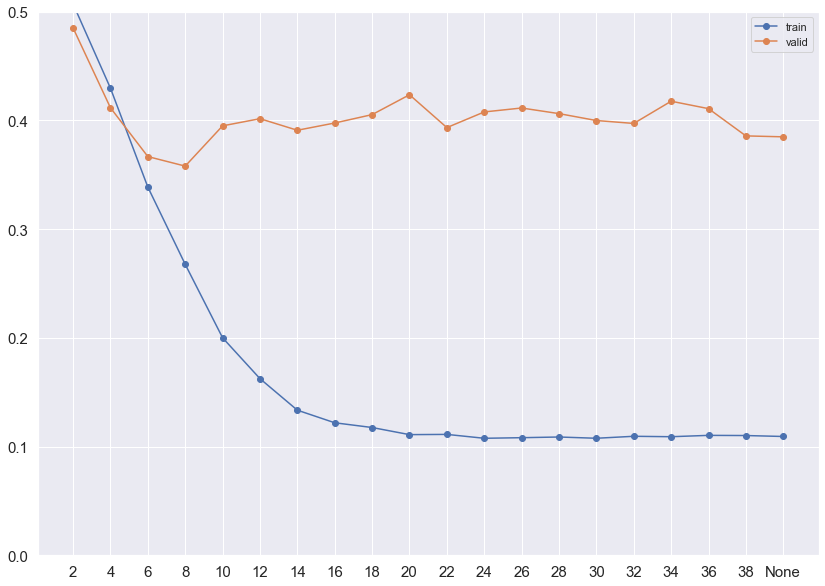

In [14]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0, 0.5), linestyle='-', style='o')
_ = ax.set_xticks(range(len(res)))
_ = ax.set_xticklabels(res.index)

In [15]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = roc_auc_score(y_train, learner.predict_proba(X_train)[:, -1])
    res.loc[str(depth), "valid"] = roc_auc_score(y_valid, learner.predict_proba(X_valid)[:, -1])

In [16]:
res

,train,valid
2,0.85,0.92
4,0.89,0.93
6,0.94,0.94
8,0.97,0.93
10,0.99,0.92
...,...,...
32,1.00,0.90
34,1.00,0.89
36,1.00,0.88
38,1.00,0.90


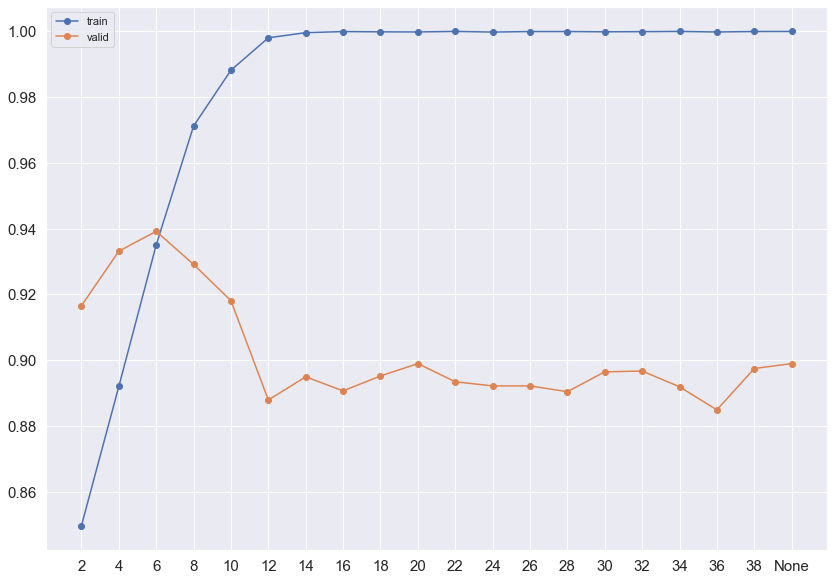

In [17]:
ax = res.plot.line(grid=True, fontsize=15, linestyle='-', style='o')
_ = ax.set_xticks(range(len(res)))
_ = ax.set_xticklabels(res.index)

In [18]:
pd.crosstab(pd.cut(learner.predict_proba(X_train)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_train)

Survived,0,1
row_0,,
"(0.1, 0.2]",100,0
"(0.2, 0.3]",34,0
"(0.3, 0.4]",7,0
"(0.4, 0.5]",1,0
"(0.5, 0.6]",0,3
"(0.6, 0.7]",1,41
"(0.7, 0.8]",0,38


In [19]:
pd.crosstab(pd.cut(learner.predict_proba(X_valid)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_valid)

Survived,0,1
row_0,,
"(0.1, 0.2]",7,3
"(0.2, 0.3]",5,2
"(0.3, 0.4]",6,3
"(0.4, 0.5]",3,1
"(0.5, 0.6]",2,5
"(0.6, 0.7]",1,2
"(0.7, 0.8]",1,3


In [20]:
#nota: observar que quitamos el "casting" a str
trees = list(range(1, 100, 10))
trees = trees + list(range(100, 1000, 100))
res = pd.DataFrame([], index=[d for d in trees], columns=["train", "valid"])
for tree in trees:
    learner = RandomForestClassifier(n_estimators=tree, max_depth=6)
    learner.fit(X_train, y_train)
    res.loc[tree, "train"] = roc_auc_score(y_train, learner.predict_proba(X_train)[:, -1])
    res.loc[tree, "valid"] = roc_auc_score(y_valid, learner.predict_proba(X_valid)[:, -1])

In [21]:
res

,train,valid
1,0.81,0.71
11,0.93,0.93
21,0.93,0.92
31,0.93,0.93
41,0.93,0.94
...,...,...
500,0.94,0.94
600,0.93,0.94
700,0.94,0.94
800,0.93,0.94


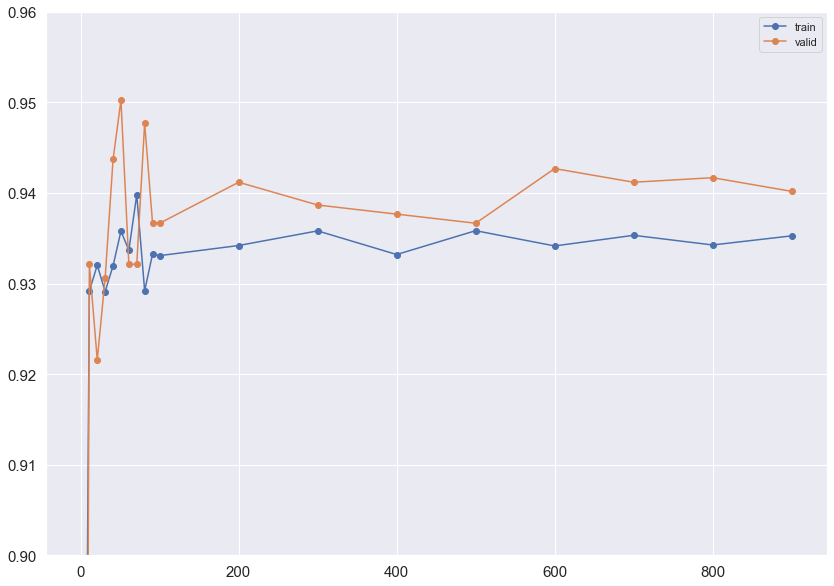

In [22]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0.9, 0.96), linestyle='-', style='o')

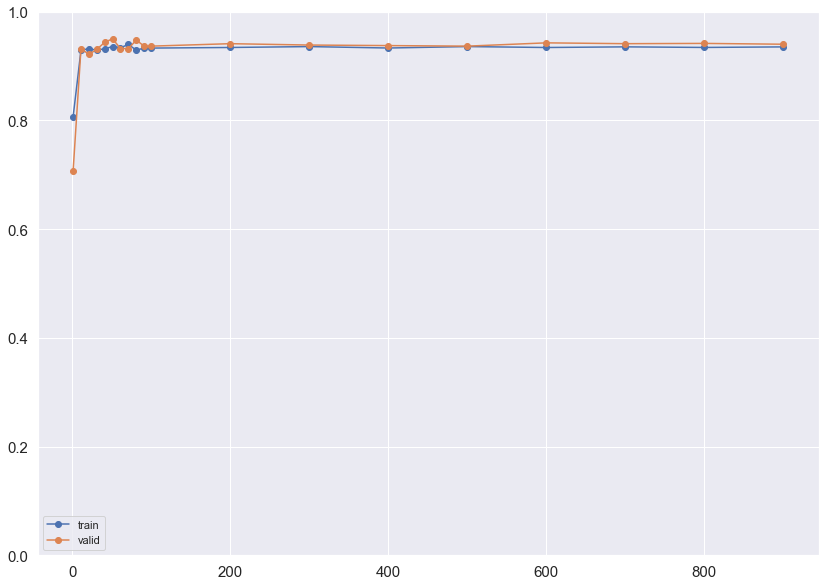

In [23]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0, 1), linestyle='-', style='o')

## Validación Cruzada en K conjuntos (K-fold cross validation)

Este método consiste en dividir el set de entrenamiento en K subconjuntos disyuntos, para luego iterativamente entrenar el algoritmo en k-1 partes y evaluar en la restante. 

Scikit Learn también tiene funciones para hacer estas divisiones


In [24]:
kf = model_selection.KFold(n_splits=5)
folds = [(data.iloc[train_idx].index, data.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(data)]
folds[0]

(Int64Index([180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
             ...
             882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
            dtype='int64', name='PassengerId', length=712),
 Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
            dtype='int64', name='PassengerId', length=179))

In [25]:
folds[0][0].shape, folds[0][1].shape

((712,), (179,))

In [26]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid"])

for depth in depths:
    valid_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = data.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = data.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
        learner.fit(X_train, y_train)
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(data.loc[valid_probs.index, "Survived"], valid_probs)

In [27]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
2,0.78,0.85,0.87,0.85,0.88,0.85
4,0.82,0.85,0.87,0.87,0.91,0.86
6,0.84,0.84,0.88,0.87,0.91,0.86
8,0.85,0.83,0.89,0.89,0.92,0.87
10,0.86,0.83,0.89,0.88,0.91,0.87
...,...,...,...,...,...,...
32,0.85,0.82,0.89,0.88,0.91,0.86
34,0.84,0.83,0.89,0.88,0.91,0.86
36,0.84,0.83,0.89,0.89,0.91,0.87
38,0.84,0.84,0.88,0.88,0.91,0.87


In [28]:
res.sort_values("valid", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
8,0.85,0.83,0.89,0.89,0.92,0.87
36,0.84,0.83,0.89,0.89,0.91,0.87
26,0.84,0.83,0.89,0.89,0.91,0.87
12,0.84,0.84,0.89,0.88,0.91,0.87
10,0.86,0.83,0.89,0.88,0.91,0.87
...,...,...,...,...,...,...
14,0.84,0.83,0.88,0.87,0.91,0.86
18,0.84,0.83,0.88,0.88,0.90,0.86
None,0.84,0.83,0.89,0.87,0.91,0.86
24,0.82,0.83,0.89,0.88,0.90,0.86


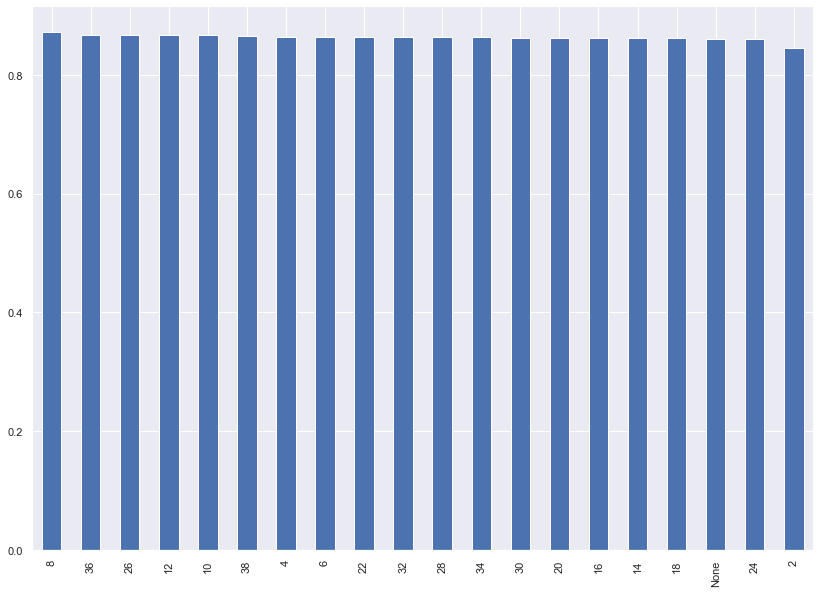

In [29]:
#diagrama de "pareto"
_ = res.sort_values("valid", ascending=False).valid.plot.bar()

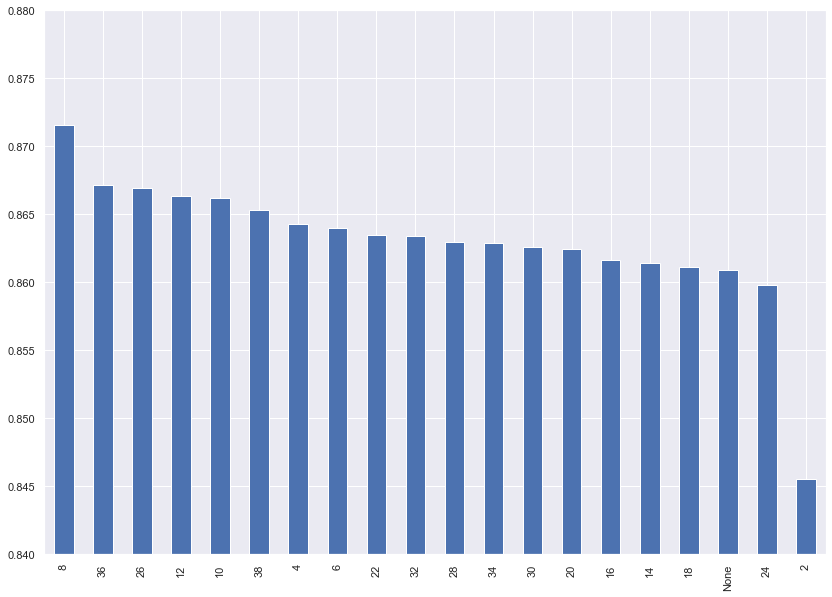

In [30]:
_ = res.sort_values("valid", ascending=False).valid.plot.bar(ylim=(0.84, 0.88))

## Combinación de métodos  y determinación de cantidad de iteraciones

Ambos métodos se pueden combinar para hacer una estimación mas completa, con el beneficio agregado que, para algunso tipos de algoritmos, se puede facilitar la estimación de la cantidad de iteraciones (ej. boosting o redes neuronales)


In [31]:
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
816,0,1,0,29.70,0,0,634,0.00,138,0,0,0,1,1
878,0,3,0,19.00,0,0,671,7.90,0,0,0,0,1,0
194,1,2,0,3.00,1,1,137,26.00,27,2,0,0,1,0
524,1,1,1,44.00,0,1,290,57.98,63,1,1,0,0,0
635,0,3,1,9.00,3,2,62,27.90,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,1,1,39.00,1,1,645,83.16,140,2,1,0,0,0
193,1,3,1,19.00,1,0,174,7.85,0,1,0,0,1,0
630,0,3,0,29.70,0,0,512,7.73,0,0,0,1,0,1


In [32]:
kf = model_selection.KFold(n_splits=5)
folds = [(train.iloc[train_idx].index, train.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(train)]
folds[0]

(Int64Index([334, 699, 482,  72,  50, 574, 339, 262, 117,  77,
             ...
             724,  10, 360, 708, 764, 836, 193, 630, 560, 685],
            dtype='int64', name='PassengerId', length=640),
 Int64Index([816, 878, 194, 524, 635, 532, 248, 267, 695, 682,
             ...
             821, 383,  21, 586,  66, 681, 879, 305, 824, 522],
            dtype='int64', name='PassengerId', length=161))

In [33]:
from lightgbm import LGBMClassifier

In [38]:
depths = list(range(2, 40, 2))
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid", "test"])

for depth in depths:
    valid_probs = []
    test_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = train.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = train.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = LGBMClassifier(n_estimators=10000, max_depth=depth)
        learner.fit(X_train, y_train,  early_stopping_rounds=10, eval_metric="auc",
                    eval_set=[(X_train, y_train),
                              (test.drop("Survived", axis=1), test.Survived),
                              (X_valid, y_valid)], verbose=0)
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
        probs = pd.Series(learner.predict_proba(test.drop("Survived", axis=1))[:, -1],
                            index=test.index, name="fold_" + str(i))
        test_probs.append(probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(train.loc[valid_probs.index, "Survived"], valid_probs)
    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    res.loc[str(depth), "test"] = roc_auc_score(test.loc[test_probs.index, "Survived"], test_probs)

In [39]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.82,0.88,0.86,0.89,0.85,0.96
4,0.88,0.85,0.87,0.82,0.88,0.85,0.95
6,0.88,0.85,0.88,0.81,0.89,0.86,0.94
8,0.87,0.84,0.88,0.82,0.88,0.85,0.95
10,0.87,0.84,0.87,0.83,0.89,0.85,0.94
...,...,...,...,...,...,...,...
30,0.87,0.84,0.88,0.82,0.88,0.85,0.94
32,0.87,0.84,0.88,0.82,0.88,0.85,0.94
34,0.87,0.84,0.88,0.82,0.88,0.85,0.94
36,0.87,0.84,0.88,0.82,0.88,0.85,0.94


In [40]:
res.sort_values("test", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.82,0.88,0.86,0.89,0.85,0.96
4,0.88,0.85,0.87,0.82,0.88,0.85,0.95
8,0.87,0.84,0.88,0.82,0.88,0.85,0.95
6,0.88,0.85,0.88,0.81,0.89,0.86,0.94
24,0.87,0.84,0.88,0.82,0.88,0.85,0.94
...,...,...,...,...,...,...,...
16,0.87,0.84,0.88,0.82,0.88,0.85,0.94
14,0.87,0.84,0.88,0.82,0.88,0.85,0.94
12,0.87,0.84,0.88,0.82,0.88,0.85,0.94
38,0.87,0.84,0.88,0.82,0.88,0.85,0.94
